In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Documents\Assignments\Assigments- Completed/bank-full.csv",";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
print('shape of  dataframe is ',df.shape)

shape of  dataframe is  (45211, 17)


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
cat_col=[n for n in df.columns if df[n].dtypes=='object']
for col in cat_col:
    print(col, '\n\n')
    print(df[col].value_counts())
    print("==========="*4)

job 


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
marital 


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
education 


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
default 


no     44396
yes      815
Name: default, dtype: int64
housing 


yes    25130
no     20081
Name: housing, dtype: int64
loan 


no     37967
yes     7244
Name: loan, dtype: int64
contact 


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
month 


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
poutcome 


unkno

Percentage of subsription :  0.0


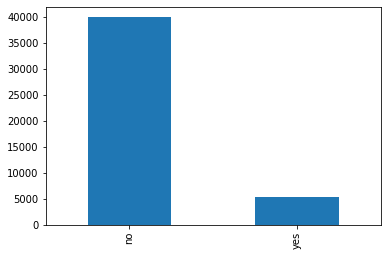

In [12]:
Sub = len(df[df['y'] == 1])

percent_sub = (Sub/len(df['y'])) * 100

print('Percentage of subsription : ',percent_sub)



df['y'].value_counts().plot.bar()

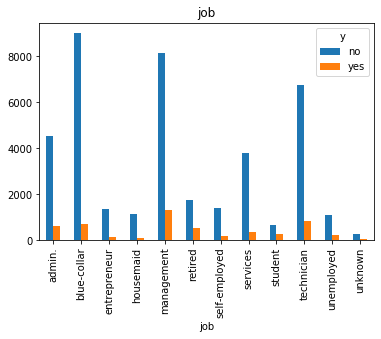

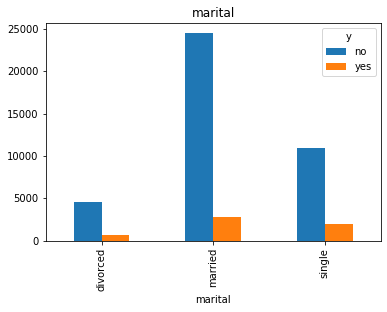

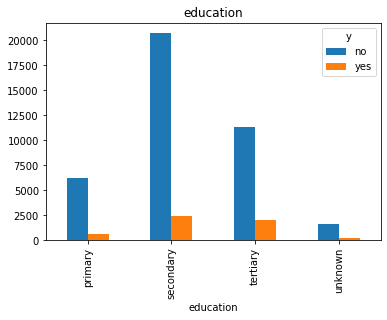

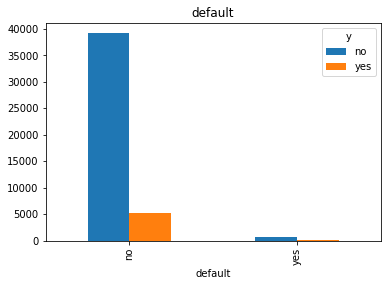

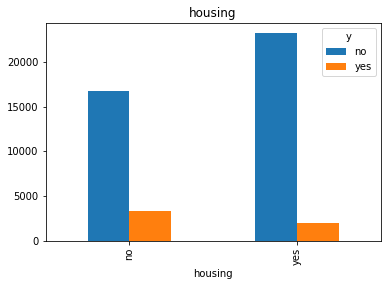

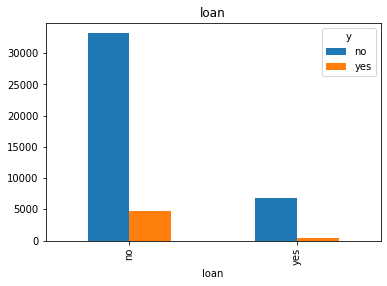

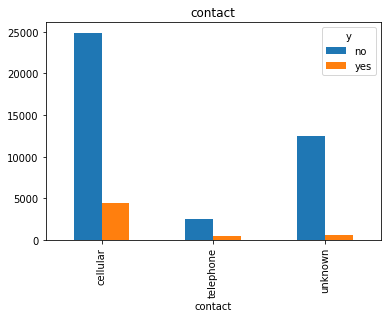

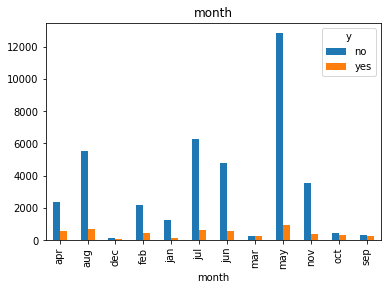

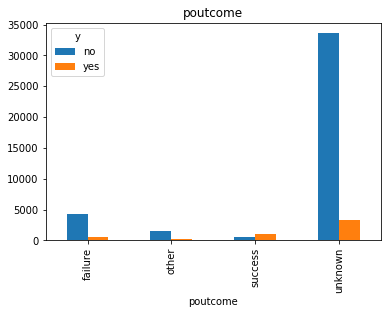

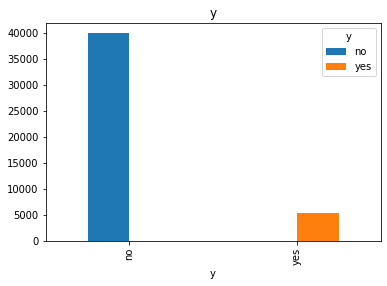

In [13]:
for col in cat_col:
    pd.crosstab(df[col], df.y).plot(kind = 'bar')
    plt.title(col)

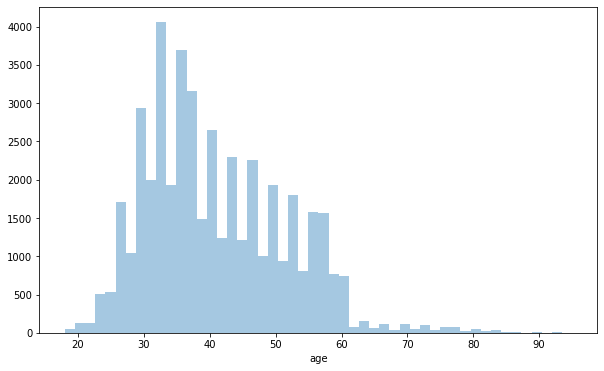

In [14]:
plt.figure(figsize = (10,6))
sns.distplot(a = df['age'], kde = False)

In [15]:
contact = ({'cellular':0, 'telephone':1})
df['contact'] = df['contact'].map(contact)

In [17]:
df = pd.get_dummies(df,columns = ['job','marital','education','default',
                                   'housing','loan','month',
                                   'day','poutcome'], drop_first = True)

In [18]:
from sklearn.utils import resample

In [19]:
X = df.loc[:,df.columns != 'y']
y = df.loc[:,df.columns == 'y']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 0)

In [20]:
print('shape of X_train : ',len(X_train), '\nshape of y_train : ',len(y_train))
print('\nshape of X_test  : ',len(X_test), '\nshape of y_test  : ',len(y_test))

shape of X_train :  31647 
shape of y_train :  31647

shape of X_test  :  13564 
shape of y_test  :  13564


In [21]:
X = pd.concat([X_train, y_train], axis = 1)


no_sub = X[X['y'] == 0]
sub = X[X['y'] == 1]


sub_upsampled = resample(sub, replace = True, n_samples = len(no_sub), random_state = 0)

y
upsampled = pd.concat([no_sub, sub_upsampled])

In [22]:
upsampled['y'].value_counts()

Series([], Name: y, dtype: int64)

In [23]:
X_train = upsampled.loc[:,upsampled.columns != 'y']
y_train = upsampled.loc[:,upsampled.columns == 'y']

ValueError: Found array with 0 sample(s) (shape=(0, 70)) while a minimum of 1 is required by StandardScaler.

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found array with 0 sample(s) (shape=(0, 70)) while a minimum of 1 is required.

NotFittedError: This LogisticRegression instance is not fitted yet